<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/24b_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%A7%88%EC%9D%B4%EB%8B%9D_%EB%8B%A8%EC%96%B4%EA%B5%AC%EB%A6%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(참고)로컬 파이참에서 실행 시  
jdk 구글링 - Java SE Development Kit Oracle - 모든쿠키수락 - Windows x64 다운로드  

```
윈도우 사용자: 내PC 우클릭 - 속성 - 고급시스템설정 -   
환경변수 - 시스템변수 - 새로만들기 - 이름 JAVA_HOME -  
디렉터리 찾아보기 - 내PC - C드라이브 - Program Files -  
Java - jdk1.8.0_281 - 확인 - 파이참 재실행 -  
터미널창 pip install jpype1  
  
** 오류 발생 시 **  
pip uninstall jpype1 -  
pip install jpype1 == 버전지정(다운그레이드)  
```

In [ ]:
# 형태소 분석
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 460kB 45.1MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [ ]:
from konlpy.tag import Okt # Twitter는 버전이 업그레이드 되면서 Okt라고 바뀜

okt = Okt()
result = okt.pos("안녕하세요. 지금 공부 중인데 운동하고 싶네요~")
print(result)


[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('지금', 'Noun'), ('공부', 'Noun'), ('중', 'Noun'), ('인데', 'Josa'), ('운동', 'Noun'), ('하고', 'Josa'), ('싶네요', 'Verb'), ('~', 'Punctuation')]


In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter


keyword = "데이터사이언스"
encoded = par.quote(keyword)
page_num = 1
result_total = "" # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기 위한 작업
while True:
  url = "https://news.joins.com/Search/JoongangNews?page={}&Keyword={}&SortType=New&SearchCategoryType=JoongangNews".format(page_num, encoded)
  code = req.urlopen(url)
  soup = BeautifulSoup(code, "html.parser")
  title = soup.select("h2.headline.mg > a")
  if len(title) == 0:
    break
  for i in title:
    print("제목: ", i.text)
    print("링크: ", i.attrs["href"])
    code_c = req.urlopen(i.attrs["href"])
    soup_c = BeautifulSoup(code_c, "html.parser")
    content = soup_c.select_one("div#article_body")
    result = content.text.strip().replace("  ", "") # strip(): 앞뒤 공백제거
    print("본문: ", result)
    print()
    result_total += result # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기
  page_num += 1
  if page_num == 2:
    break

okt = Okt()
nouns_list = okt.nouns(result_total) # 명사만 추출하여 리스트형으로 반환
for i in nouns_list: # 불용어 제거
  if len(i) == 1:
    nouns_list.remove(i)
print(nouns_list)
cnt = Counter(nouns_list) # 명사 갯수
print(cnt) 


제목:  17년치 데이터로 4년뒤 집값 안다···“부동산 장기하락 할수도”
링크:  https://news.joins.com/article/23992644
본문:  서울 영등포구 63스퀘어에서 바라본 아파트단지. [뉴스1]   "현재 수도권 아파트 가격은 본질 가치 대비 심각한 고평가 구간에 있다. 버블이 심한 상태다."'부동산 리치고' 김기원 데이터노우즈 대표 인터뷰"1~2년 내 부동산 시장 변곡점 올 가능성이 커"17년치 데이터 학습한 AI, 4년 뒤 미래가격 예측 "데이터는 등대" …정책 수립에도 데이터 활용해야   '부동산 빅데이터 전문가' 김기원(51) 데이터노우즈 대표의 진단이다. 김 대표는 "데이터를 분석해보면 1~2년 내 부동산 시장에 변곡점이 올 가능성이 크다"며 "하락한다면 예상보다 크게 떨어지고, 오래갈 수 있다"고 경고했다.    문재인 대통령 출범 이후 지난 4년간 서울 아파트값은 84%(서울대 환경대학원 분석) 올랐다. 올해도 집값 상승을 예상하는 전문가가 많지만 인공지능(AI)은 하방압력이 크다고 분석했다는 게 김 대표의 얘기다.     데이터노우즈 김기원 대표 [데이터노우즈] 김 대표는 프롭테크(부동산 IT기술) 스타트업 데이터노우즈를 2019년 설립해 운영하고 있다. 데이터노우즈는 "데이터는 답을 알고 있다"는 뜻이다. 김 대표는 "데이터가 부동산 시장을 정확하게 전망할 수 있는 시대가 왔다고 판단했다"고 말했다.    "능력만 보고 결혼 상대를 고르라고?"   김 대표는 "40대에 접어들면서 주변을 보니, 부자는 대부분 부동산 투자로 돈을 벌고 있었다"며 "4년간 전국의 부동산 관련 강의를 죄다 쫓아다녔는데, 강의료로만 5000만원은 넘게 쓴 것 같다"고 했다. 하지만 전문가를 만나 조언을 들을수록 답답함만 커졌다. 그는 "'공급이 적으니 이 지역이 유망하다'는 식으로 한 두 가지 데이터로 판단을 내리는 전문가가 많았다"며 "마치 능력 하나만 보고 결혼 상대를 고르라는 것 같았다"고 말했다.     김 대표는 한양대에서 수학, 

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pillow
!pip install numpy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


제목:  17년치 데이터로 4년뒤 집값 안다···“부동산 장기하락 할수도”
링크:  https://news.joins.com/article/23992644
본문:  서울 영등포구 63스퀘어에서 바라본 아파트단지. [뉴스1]   "현재 수도권 아파트 가격은 본질 가치 대비 심각한 고평가 구간에 있다. 버블이 심한 상태다."'부동산 리치고' 김기원 데이터노우즈 대표 인터뷰"1~2년 내 부동산 시장 변곡점 올 가능성이 커"17년치 데이터 학습한 AI, 4년 뒤 미래가격 예측 "데이터는 등대" …정책 수립에도 데이터 활용해야   '부동산 빅데이터 전문가' 김기원(51) 데이터노우즈 대표의 진단이다. 김 대표는 "데이터를 분석해보면 1~2년 내 부동산 시장에 변곡점이 올 가능성이 크다"며 "하락한다면 예상보다 크게 떨어지고, 오래갈 수 있다"고 경고했다.    문재인 대통령 출범 이후 지난 4년간 서울 아파트값은 84%(서울대 환경대학원 분석) 올랐다. 올해도 집값 상승을 예상하는 전문가가 많지만 인공지능(AI)은 하방압력이 크다고 분석했다는 게 김 대표의 얘기다.     데이터노우즈 김기원 대표 [데이터노우즈] 김 대표는 프롭테크(부동산 IT기술) 스타트업 데이터노우즈를 2019년 설립해 운영하고 있다. 데이터노우즈는 "데이터는 답을 알고 있다"는 뜻이다. 김 대표는 "데이터가 부동산 시장을 정확하게 전망할 수 있는 시대가 왔다고 판단했다"고 말했다.    "능력만 보고 결혼 상대를 고르라고?"   김 대표는 "40대에 접어들면서 주변을 보니, 부자는 대부분 부동산 투자로 돈을 벌고 있었다"며 "4년간 전국의 부동산 관련 강의를 죄다 쫓아다녔는데, 강의료로만 5000만원은 넘게 쓴 것 같다"고 했다. 하지만 전문가를 만나 조언을 들을수록 답답함만 커졌다. 그는 "'공급이 적으니 이 지역이 유망하다'는 식으로 한 두 가지 데이터로 판단을 내리는 전문가가 많았다"며 "마치 능력 하나만 보고 결혼 상대를 고르라는 것 같았다"고 말했다.     김 대표는 한양대에서 수학, 

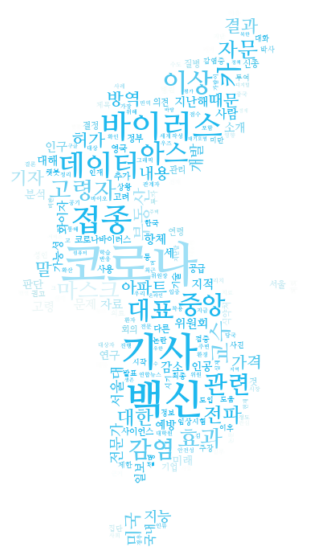

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt # pip install matplotlib
from PIL import Image # pip install pillow
import numpy as np # pip install numpy

keyword = "데이터사이언스"
encoded = par.quote(keyword)
page_num = 1
result_total = "" # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기 위한 작업
while True:
  url = "https://news.joins.com/Search/JoongangNews?page={}&Keyword={}&SortType=New&SearchCategoryType=JoongangNews".format(page_num, encoded)
  code = req.urlopen(url)
  soup = BeautifulSoup(code, "html.parser")
  title = soup.select("h2.headline.mg > a")
  if len(title) == 0:
    break
  for i in title:
    print("제목: ", i.text)
    print("링크: ", i.attrs["href"])
    code_c = req.urlopen(i.attrs["href"])
    soup_c = BeautifulSoup(code_c, "html.parser")
    content = soup_c.select_one("div#article_body")
    result = content.text.strip().replace("  ", "") # strip(): 앞뒤 공백제거
    print("본문: ", result)
    print()
    result_total += result # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기
  page_num += 1
  if page_num == 2:
    break

okt = Okt()
nouns_list = okt.nouns(result_total) # 명사만 추출하여 리스트형으로 반환
for i in nouns_list: # 불용어 제거
  if len(i) == 1:
    nouns_list.remove(i)
cnt = Counter(nouns_list) # 명사 갯수 
print(cnt)

img_list = np.array( Image.open("/content/my_img.jpg") ) # 내가 저장한 이미지를 수치로 변환해서 리스트형으로 반환
img_color = wordcloud.ImageColorGenerator(img_list)

cloud_image = wordcloud.WordCloud(font_path="/content/NanumMyeongjoBold.ttf", background_color="white", mask=img_list).generate_from_frequencies(cnt) # 한글폰트 .ttf파일
plt.figure(figsize=(10,10))
plt.imshow(cloud_image.recolor(color_func=img_color), interpolation="bilinear") # bilinear은 텍스트를 좀 더 부드럽게 시각화
plt.axis("off") # 세로축과 가로축 라벨 제거
plt.show()

제목:  17년치 데이터로 4년뒤 집값 안다···“부동산 장기하락 할수도”
링크:  https://news.joins.com/article/23992644
본문:  서울 영등포구 63스퀘어에서 바라본 아파트단지. [뉴스1]   "현재 수도권 아파트 가격은 본질 가치 대비 심각한 고평가 구간에 있다. 버블이 심한 상태다."'부동산 리치고' 김기원 데이터노우즈 대표 인터뷰"1~2년 내 부동산 시장 변곡점 올 가능성이 커"17년치 데이터 학습한 AI, 4년 뒤 미래가격 예측 "데이터는 등대" …정책 수립에도 데이터 활용해야   '부동산 빅데이터 전문가' 김기원(51) 데이터노우즈 대표의 진단이다. 김 대표는 "데이터를 분석해보면 1~2년 내 부동산 시장에 변곡점이 올 가능성이 크다"며 "하락한다면 예상보다 크게 떨어지고, 오래갈 수 있다"고 경고했다.    문재인 대통령 출범 이후 지난 4년간 서울 아파트값은 84%(서울대 환경대학원 분석) 올랐다. 올해도 집값 상승을 예상하는 전문가가 많지만 인공지능(AI)은 하방압력이 크다고 분석했다는 게 김 대표의 얘기다.     데이터노우즈 김기원 대표 [데이터노우즈] 김 대표는 프롭테크(부동산 IT기술) 스타트업 데이터노우즈를 2019년 설립해 운영하고 있다. 데이터노우즈는 "데이터는 답을 알고 있다"는 뜻이다. 김 대표는 "데이터가 부동산 시장을 정확하게 전망할 수 있는 시대가 왔다고 판단했다"고 말했다.    "능력만 보고 결혼 상대를 고르라고?"   김 대표는 "40대에 접어들면서 주변을 보니, 부자는 대부분 부동산 투자로 돈을 벌고 있었다"며 "4년간 전국의 부동산 관련 강의를 죄다 쫓아다녔는데, 강의료로만 5000만원은 넘게 쓴 것 같다"고 했다. 하지만 전문가를 만나 조언을 들을수록 답답함만 커졌다. 그는 "'공급이 적으니 이 지역이 유망하다'는 식으로 한 두 가지 데이터로 판단을 내리는 전문가가 많았다"며 "마치 능력 하나만 보고 결혼 상대를 고르라는 것 같았다"고 말했다.     김 대표는 한양대에서 수학, 

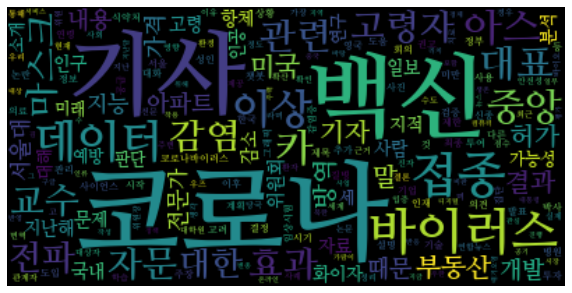

In [ ]:
keyword = "데이터사이언스"
encoded = par.quote(keyword)
page_num = 1
result_total = "" # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기 위한 작업
while True:
  url = "https://news.joins.com/Search/JoongangNews?page={}&Keyword={}&SortType=New&SearchCategoryType=JoongangNews".format(page_num, encoded)
  code = req.urlopen(url)
  soup = BeautifulSoup(code, "html.parser")
  title = soup.select("h2.headline.mg > a")
  if len(title) == 0:
    break
  for i in title:
    print("제목: ", i.text)
    print("링크: ", i.attrs["href"])
    code_c = req.urlopen(i.attrs["href"])
    soup_c = BeautifulSoup(code_c, "html.parser")
    content = soup_c.select_one("div#article_body")
    result = content.text.strip().replace("  ", "") # strip(): 앞뒤 공백제거
    print("본문: ", result)
    print()
    result_total += result # 모든 뉴스기사 본문들을 하나의 텍스트로 합치기
  page_num += 1
  if page_num == 2:
    break

okt = Okt()
nouns_list = okt.nouns(result_total) # 명사만 추출하여 리스트형으로 반환
for i in nouns_list: # 불용어 제거
  if len(i) == 1:
    nouns_list.remove(i)
cnt = Counter(nouns_list) # 명사 갯수 
print(cnt)

cloud_image = wordcloud.WordCloud(font_path="/content/NanumMyeongjoBold.ttf").generate_from_frequencies(cnt) # 한글폰트 .ttf파일
plt.figure(figsize=(10,10))
plt.imshow(cloud_image, interpolation="bilinear") # bilinear은 텍스트를 좀 더 부드럽게 시각화
plt.axis("off") # 세로축과 가로축 라벨 제거
plt.show()

Counter({'아빠': 101, '엄마': 34, '우리': 25, '사랑': 25, '밤비': 24, '후드': 16, '생각': 13, '언니': 12, '리스': 11, '완전': 11, '민정': 10, '교수': 10, '오늘': 9, '최고': 9, '장': 9, '진짜': 8, '색상': 8, '과제': 8, '민주': 8, '지금': 8, '설치': 8, '김민주': 8, '역시': 7, '제일': 7, '회색': 7, '돼지': 7, '수업': 7, '빵': 7, '디자인': 6, '카이스트': 6, '학교': 6, '공부': 6, '갈치': 6, '차단': 6, '저': 6, '클릭': 5, '라지': 5, '패키지': 5, '걱정': 5, '삭제': 5, '메시지': 5, '어제': 4, '로고': 4, '하나': 4, '후': 4, '모두': 4, '전부': 4, '사용': 4, '피부': 4, '이용': 4, '정도': 4, '대요': 4, '강요': 4, '살수': 4, '카톡': 4, '공지': 4, '오빠': 4, '나중': 4, '또': 4, '고구마': 4, '전화': 4, '완료': 4, '등록': 4, '제품': 4, '문제': 4, '다른': 4, '동영상': 4, '도착': 4, '사장': 4, '파일': 4, '부품': 4, '그': 4, '한라': 4, '신협': 4, '에이': 4, '기간': 4, '멸치': 4, '메롱': 4, '대용': 4, '눈물': 4, '데이터': 4, '모니터': 4, '용': 4, '피자': 4, '양파': 4, '거': 4, '하트': 4, '송금': 4, '페이지': 3, '확대': 3, '저번': 3, '사이즈': 3, '원단': 3, '퀄리티': 3, '거기': 3, '아이보리': 3, '자크': 3, '하라': 3, '포즈': 3, '그냥': 3, '마스크': 3, '학과': 3, '동기': 3, '이제': 3, '선택': 3, '장난': 3, '한번': 3, '주문': 3

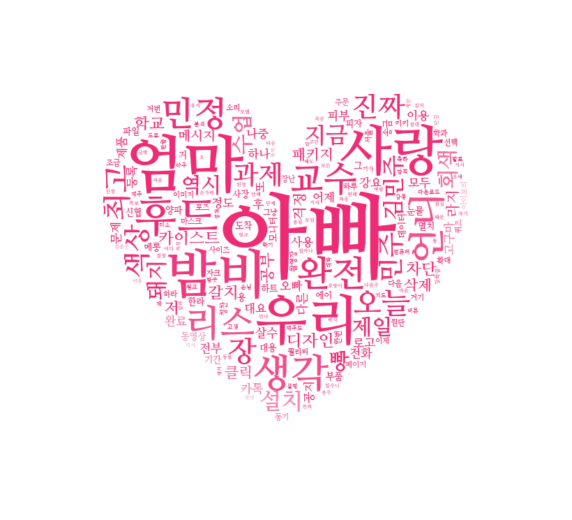

In [ ]:
import urllib.request as req
from bs4 import BeautifulSoup
import urllib.parse as par
from konlpy.tag import Okt
from collections import Counter
import wordcloud
import matplotlib.pyplot as plt # pip install matplotlib
from PIL import Image # pip install pillow
import numpy as np # pip install numpy


text = ""
with open("카톡1_201009.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()
    for i in lines[5:]:
        x = i.split(" : ")[0]
        text += i.replace(x,"").replace(":","").replace("이모티콘","").replace("사진","").replace("사람","")
    # print(text)

okt = Okt()
nouns_list = okt.nouns(text) # 명사만 추출하여 리스트형으로 반환
for i in nouns_list: # 불용어 제거
    if len(i) == 1:
        nouns_list.remove(i)
cnt = Counter(nouns_list) # 명사 갯수
print(cnt)

img_list = np.array( Image.open("/content/img.jpg") ) # 내가 저장한 이미지를 수치로 변환해서 리스트형으로 반환
img_color = wordcloud.ImageColorGenerator(img_list)

cloud_image = wordcloud.WordCloud(font_path="/content/NanumMyeongjoBold.ttf", background_color="white", mask=img_list).generate_from_frequencies(cnt) # 한글폰트 .ttf파일
plt.figure(figsize=(10,10))
plt.imshow(cloud_image.recolor(color_func=img_color), interpolation="bilinear") # bilinear은 텍스트를 좀 더 부드럽게 시각화
plt.axis("off") # 세로축과 가로축 라벨 제거
plt.show()
